<a name="cell-MCMC-TOC"></a>

3. [High Dimensional Integration](#cell-integration-dimension)
  1. [Dimension Agnostic Integration](#cell-integration-dimension-scaling)
      1. [Sampling High Demensional](#cell-MCint-highdimensionalX) $\mathbf{X} \sim p_\mathbf{X}(\mathbf{x})$
      2. [The Markov Property and Markov Chains](#cell-MCint-MC)
      3. [Markov Chain Monte Carlo (MCMC)](#cell-MCint-MCMC)

  2. [More Sampling](#cell-MCint-sampling)
      1. [Slice Sampling](#cell-MCint-slice)
      2. [Sampling Marginal Distributions](#cell-MCint-sampling-marginals)
      3. [Gibbs Sampling](#cell-MCint-gibbs)
      4. [More Sampling Efficiency: Rao-Blackwellization](#cell-MCint-RaoB)
      5. [Metropolis-Hastings](#cell-MCint-sampling-MCMC-MH)

  3. [Hamiltonian Dynamics](#cell-MCint-Hamiltonian-Dynamics)
      1. [Energy Contours](#cell-MCint-sampling-MCMC-HMC-contour)
      2. [Energy Perturbation Proposals](#cell-MCint-sampling-MCMC-HMC-energy-proposals)
      3. [Putting it All Together: Metropolis-Hastings Proposals](#cell-MCint-sampling-MCMC-HMC-MH)
      4. [Hamiltonian Monte Carlo (HMC)](#cell-MCint-sampling-MCMC-HMC)
      5. [Why Hamiltonian Monte Carlo (HMC)?](#cell-MCint-sampling-MCMC-HMC2)
      6. [Marginal/Posterior Distributions](#cell-MCint-sampling-MCMC-HMC3)


<a name="cell-integration-dimension"></a>

# 3. High Dimensional Integration ([Return to TOC](#cell-MCMC-TOC))

---

- Numerical ***integral approximation*** like `scipy.integrate.quad`<br>is not ***integration estimation*** 
    - ***Estimation*** is a statistical technique while ***approximation*** is the truncation or other alteration of a mathematical formulation providing a simpler computation. 
    - ***Floating point numbers*** are an ***approximation*** and see `STA410_W24_Week2_Extra_IntegralApproximation.ipynb`

For scalar valued $\overline{g(X)}$ the standard error of the ***integration estimator*** is $O(n^{-1/2})$ $$E[g(X)] = \int \! g(x) p_X(x) dx \quad \text{ regardless of the dimension of } \quad X \sim p_X(x)$$

***Integral approximations*** in dimension $d$ are based on function evaluation summation over an $n^d$ grid causing (assuming computational feasibility) a one dimensional error $\epsilon$ to scale as $O\left(\frac{1}{\sqrt[d]{\frac{1}{\epsilon}}}\right)$

<a name="cell-integration-dimension-scaling"></a>

## 3.A Dimension Agnostic Integration ([Return to TOC](#cell-MCMC-TOC))

---

The power of ***integral estimation*** lies in its (theoretical) bypass of a "curse of dimensionality" 

$$E[g(\mathbf{X})] = \int\int\cdots\int \! g(\mathbf{x}) p_\mathbf{X}(\mathbf{x}) dx_1dx_2\cdots dx_n$$

is dimension agnostic while ***integration approximation*** accuracy degrades with dimension $d$ 


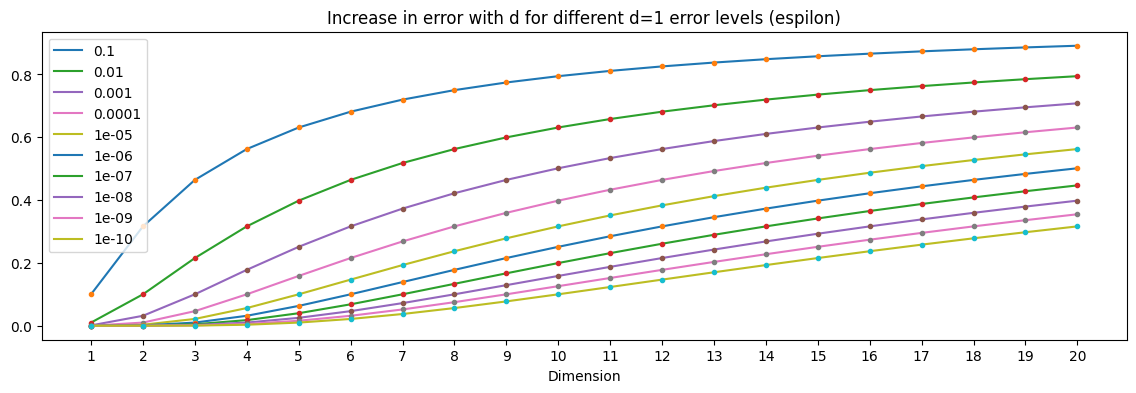

In [25]:
import matplotlib.pyplot as plt; import numpy as np; plt.figure(figsize=(14,4))
for ep_inv in np.logspace(1,10,10):
  plt.plot(ep_inv**(-1/np.arange(1,21)), label=1/ep_inv); plt.plot(ep_inv**(-1/np.arange(1,21)), '.')
plt.legend(); plt.xlabel("Dimension"); plt.xticks(np.arange(0,20, dtype=int), np.arange(1,21, dtype=int)), plt.title("Increase in error with d for different d=1 error levels (espilon)");


<a name="cell-MCint-highdimensionalX"></a>

## 3.A.a Sampling High Demensional $\mathbf{X} \sim p_\mathbf{X}(\mathbf{x})$ ([Return to TOC](#cell-MCMC-TOC))

---

$$E[g(\mathbf{X})] = \int\int\cdots\int \! g(\mathbf{x}) p_\mathbf{X}(\mathbf{x}) dx_1dx_2\cdots dx_n$$

But can we sample from high dimensional $\mathbf{X} \sim p_\mathbf{X}(\mathbf{x}) \quad ?$

- Sure, use the ***chain rule***

\begin{align*}
p_{X^{(T)}, \cdots, X^{(0)}}(x^{(T)}, \cdots, x^{(0)}) = & {} \prod_{t=1}^T p_{X^{(t)}|X^{(t-1)}, \cdots, X^{(0)}}(x^{(t)} | x^{(t-1)}, \cdots, x^{(0)})
\end{align*}


1. Sample $p_{X^{(0)}}(x^{(0)})$

2. Sample $p_{X^{(1)}|X^{(0)}}(x^{(1)}|x^{(0)})$

3. Sample $p_{X^{(2)}|X^{(1)},X^{(0)}}(x^{(2)}|x^{(1)},x^{(0)})$

4. $\cdots$ and so on $\cdots$



<a name="cell-MCint-MC"></a>

## 3.A.b The Markov Property and Markov Chains ([Return to TOC](#cell-MCMC-TOC))

---

$$E[g(\mathbf{X})] = \int\int\cdots\int \! g(\mathbf{x}) p_\mathbf{X}(\mathbf{x}) dx_1dx_2\cdots dx_n$$

But can we sample from high dimensional $\mathbf{X} \sim p_\mathbf{X}(\mathbf{x}) \quad ?$

- ***Markov chains*** are sequential dependency structure satisfying the ***Markov property***

$$p_{X^{(t)}|X^{(t-1)}, \cdots, X^{(0)}}(x^{(t)} | x^{(t-1)}, \cdots, x^{(0)}) = p_{X^{(t)}|X^{(t-1)}}(x^{(t)} | x^{(t-1)})\require{cancel}$$

$x^{(t)}$ and $x^{(t-2)}$ are ***conditionally independent*** given $x^{(t-1)}$

$$\underset{\newcommand\ci{\perp\!\!\!\perp}\text{more generally } \quad x^{(t)} \cancel \ci  x^{(t')} \quad \text{ but } \quad  x^{(t)} \ci  x^{(t')} | x^{(t^*)} \quad \text{ for } t < t^* < t'}{\newcommand\ci{\perp\!\!\!\perp} x^{(t)} \cancel \ci  x^{(t-2)} \quad \text{ but } \quad  x^{(t)} \ci  x^{(t-2)} | x^{(t-1)}}$$


\begin{align*}
\text{but then } p_{X^{(T)}, \cdots, X^{(0)}}(x^{(T)}, \cdots, x^{(0)}) = & {} \prod_{t=1}^T p_{X^{(t)}|X^{(t-1)}, \cdots, X^{(0)}}(x^{(t)} | x^{(t-1)}, \cdots, x^{(0)}) \\
\text{simpifying the} \textbf{ chain rule}\text{...} \quad\quad = & {} \prod_{t=1}^T p_{X^{(t)}|X^{(t-1)}}(x^{(t)} | x^{(t-1)}) 
\end{align*}


<a name="cell-MCint-MCMC"></a>

## 3.A.c Markov Chain Monte Carlo (MCMC) ([Return to TOC](#cell-MCMC-TOC))

---

In a ***Markov chain*** sequential samples from $p_{X^{(t)}|X^{(t-1)}}(x^{(t)} | x^{(t-1)})$ sample the joint distribution of $p_{X^{(T)}, \cdots, X^{(0)}}(x^{(T)}, \cdots, x^{(0)})$ as a result of the ***Markov property*** simplification of the ***chain rule***

\begin{align*}
p_{X^{(T)}, \cdots, X^{(0)}}(x^{(T)}, \cdots, x^{(0)}) = & {} \prod_{t=1}^T p_{X^{(t)}|X^{(t-1)}, \cdots, X^{(0)}}(x^{(t)} | x^{(t-1)}, \cdots, x^{(0)}) \\
\quad\quad = & {} \prod_{t=1}^T p_{X^{(t)}|X^{(t-1)}}(x^{(t)} | x^{(t-1)}) 
\end{align*}

Each $x^{(t)}$ is therefore a representative sample of its marginal distribution $p_{X^{(t)}}(x^{(t)})$ even though 

1. $x^{(t)}$ was instead sampled from $p_{X^{(t)}|X^{(t-1)}}(x^{(t)}|x^{(t-1)})$
2. resulting in the dependent collection of samples $(x^{(T)}, \cdots, x^{(0)})$

- For identical marginal distributions for each $x^{(t)}$ 
$x^{(t)} \sim p_{X^{(t)}}(x^{(t)}) = p_X(x^{(t)}) \text{ for all } t$<br>
so $(x^{(T)}, \cdots, x^{(0)})$ is a correlated sample from $p_X(x)$ 






## 3.A.c Markov Chain Monte Carlo (MCMC)

---


Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [x]


Sampling 4 chains for 0 tune and 500 draw iterations (0 + 2_000 draws total) took 0 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


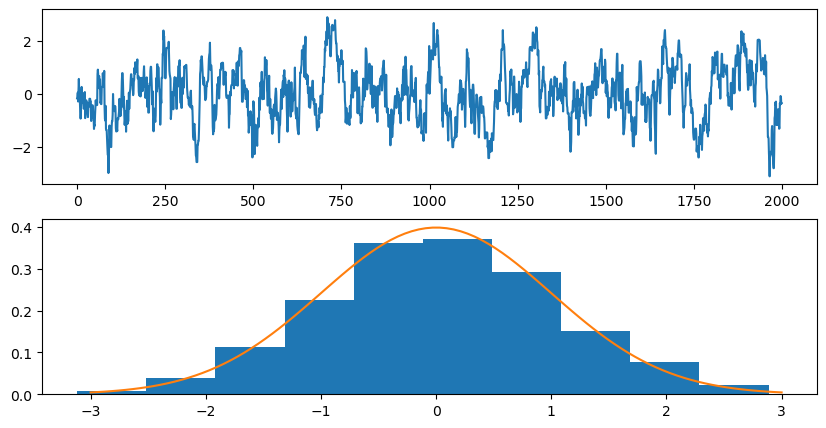

In [3]:
import pymc as pm; import matplotlib.pyplot as plt; import numpy as np; from scipy import stats
# A demonstration of depdendent samples which over time nonetheless represent a marginal distribution
with pm.Model() as model:
    x = pm.Normal("x", mu=0, sigma=1)
    dependent_samples = pm.sample(500, tune=False, return_inferencedata=False, 
                                  step=pm.Metropolis(vars=[x], S=np.array([0.5])))
fig,ax = plt.subplots(2,1, figsize=(10,5)); ax[0].plot(dependent_samples['x']); ax[1].hist(dependent_samples['x'], density=True); ax[1].plot(np.linspace(-3,3,100), stats.norm.pdf(np.linspace(-3,3,100)));

<a name="cell-MCint-sampling"></a>

## 3.B More Sampling Algorithms ([Return to TOC](#cell-MCMC-TOC))

---

***Markov chain Monte Carlo (MCMC)*** is when there are enough dependent samples $x^{(t)}$ from a ***Markov Chain*** to sufficiently represent samples from $p_{X}$ (to use them for ***MCMC integration***)

- If $T$ is sufficiently large then the bias in the sample caused by the dependence in $(x^{(T)}, \cdots, x^{(0)})$ will "wash out" and won't matter in the context all the samples together 

Sampling $p_{X^{(t)}|X^{(t-1)}}(x^{(t)}|x^{(t-1)})$ precisely could be done using **Adaptive Squeezed Rejection Sampling** method of `STA410_W24_Week2_Demo_AdaptiveRejectionSampling.ipynb` 

- This was how first-generation probabilistic programming tool **WinBugs** provided **MCMC** sampling using just a likelihood and a prior specification (and no user supplied derivations) 


We'll now introduce
***(a) Slice sampling, (b) Gibbs sampling, and (c) Metropolis-Hastings sampling*** alternatives and/or complementary methodologeis to **Adaptive Squeezed Rejection Sampling**



<a name="cell-MCint-slice"></a>

## 3.B.a Slice Sampling ([Return to TOC](#cell-MCMC-TOC))


Carefully traversing a (dependent) sequential paths "beneath" the density function of a ***target distribution***: not wasting samples "outside" of the 2d sampling space (like ***rejection sampling*** does)


![](https://barumpark.com/assets/img/slicesamps-1.png)



## 3.B.a Slice Sampling

---

Alternatingly sample $\;\;$ (A) $y_t \sim \text{Unif}(0,p_X(x_{t-1}))$  $\;\;$ and $\;\;$ (B) $x_t \sim \text{Unif}( \{x: y_{t} \leq p_X(x_t)\})$ 

For (B) produce a bounding interval around $x_{t-1}$ and sample $x_t$ from it uniformly by

1. rejecting $x_t$, adjusting the bounding interval, and trying again if $p_X(x_t) < y_{t}$
2. keeping $x_t$ if $y_{t} \leq p_X(x_t)$ (so ***slice sampling*** uses a ***rejection sampling*** substep)



|![](https://www.researchgate.net/profile/Michael-Jordan-3/publication/227276601/figure/fig14/AS:668556802928655@1536407771607/Slice-sampling-given-a-previous-sample-we-sample-a-uniform-variable-u-i-1-between-0.png)|![](https://www.researchgate.net/profile/Benyamin-Ghojogh/publication/345215567/figure/fig6/AS:953627036381186@1604373811408/The-steps-in-slice-sampling-algorithm.ppm)|
|-|-|
| | |

***Slice sampling*** is ***MCMC*** with 

$$p_{X_t,Y_t|X_{t-1}}(x_t,y_t|x_{t-1}) = p_{X_{t}|Y_t}(x_t|y_t) p_{Y_t|X_{t-1}}(y_t|x_{t-1})$$

for $\;p_{Y_t|X_{t-1}}(y_t|x_{t-1}) = \text{Unif}(0,p_X(x_{t-1}))\;$ and $\;p_{X_{t}|Y_t}(x_t|y_t) = \text{Unif}( \{x: y_{t} \leq p_X(x)\})$ 



<a name="cell-MCint-sampling-marginals"></a>

## 3.B.b Sampling Marginal Distributions ([Return to TOC](#cell-MCMC-TOC))

---

***Slice sampling*** produces a ***Markov chain*** $\big((x_T, y_T)), (x_{T-1}, y_{T-1}), \cdots, (x_1, y_1), (x_0, y_0)\big)$ from the joint distribiution $p_{(X_t,Y_t)}(x_t,y_t)$; or, this could be rewritten as two ***Markov chains***

$$(x_T, x_{T-1}, \cdots, x_1, x_0) \quad \text{ and } \quad (y_T, y_{T-1}, \cdots, y_1, y_0)$$

***Slice sampling*** then uses the single chain $(x_T, x_{T-1}, \cdots, x_1, x_0)$ as **MCMC** samples from  $p_{X_t}(x_t)$ 
- *since this is what it is if $(x_T, y_T)$ is an **MCMC** sample from the **joint distribution** $p_{(X_t,Y_t)}(x_t,y_t)$*

This performs the action of **marginalizing** (integrating out) the auxiliary variable $Y_t$

$$p_{X_t}(x_t) = \int p_{(X_t,Y_t)}(x_t,y_t) dY_t$$

- So once again, integration is readily facilitated by **MCMC**...

<a name="cell-MCint-gibbs"></a>

## 3.B.c Gibbs Sampling ([Return to TOC](#cell-MCMC-TOC))

---

The process of alternatingly sampling between $p_{(X_t|Y_t)}(x_t|y_t)$ and $p_{(Y_t|X_t)}(y_t|x_t)$ undertaken by ***slice sampling*** can also be generalized into the procedure known as ***Gibbs sampling***$

***Gibbs sampling*** produces samples from $p(\theta_1, \cdots, \theta_q|x)$ by instead cyclically sampling from the 


|*Full Conditionals*| |
|-|-|
| \begin{align*}1.\;&\;{} p(\theta_1^{(t)}|\theta_q^{(t-1)}, \cdots, \theta_2^{(t-1)}, x)\\ 2.\; &\;{} p(\theta_2^{(t)}|\theta_q^{(t-1)}, \cdots, \theta_3^{(t-1)}, \theta_1^{(t)}, x)\\ 3.\;&\;{} p(\theta_3^{(t)}|\theta_q^{(t-1)}, \cdots, \theta_4^{(t-1)}, \theta_2^{(t)}, \theta_1^{(t)}, x)\\4. \;&\;{} p(\theta_4^{(t)}|\theta_q^{(t-1)}, \cdots, \theta_5^{(t-1)}, \theta_3^{(t)}, \theta_2^{(t)},\theta_1^{(t)}, x)\\\vdots\\ q. \;&\;{} p(\theta_q^{(t)}|\theta_{q-1}^{(t)}, \cdots, \theta_1^{(t)}, x) \quad\text{[ return to 1.]}\end{align*} |***Gibbs sampling*** does not follow a ***chain rule*** decomposing of the joint distribution, but it nonetheless can be shown to produce samples from<br><br>$$p(\theta_q, \cdots, \theta_1|x)$$<br>This process generates $\theta^{(t)}$ on the basis of $\theta^{(t-1)}$ so ***Gibbs sampling*** produces a ***Markov chain*** with respect to the (multivariate) parameter vector $\theta$|


***Gibbs sampling*** was once a dominant staple of Bayesian model fitting methodology. However, the sequential dependence in the parameters induced by ***Gibbs sampling*** quickly suffers a prohibitive "curse of dimensionality" that limits its application to low dimentional parameter spaces. The advent of ***Hamiltonian Monte Carlo*** (***HMC***) which avoids inducing a sequential dependence in parameter sampling has thus relegated the use of ***Gibbs sampling*** to the domain of discrete random variable contexts (often in conjuction with ***Metropolis-Hastings***) where ***HMC*** (which only addresses continuous random variables) cannot be applied.



## 3.B.c Gibbs Sampling

---

The canonical example of ***Gibbs sampling*** is the ***normal-gamma*** model

$$\begin{align*}
p\left(x|\mu,\tau=\frac{1}{\sigma^2}\right) = {} & \prod_{i=1}^n \sqrt{\frac{\tau}{2\pi}} e^{-\frac{\tau}{2}(x_i-\mu)^2}\\
p(\mu,\tau) \propto {} & 1 \\
p(\mu,\tau| x) \propto p(\mu,\tau, x) \propto {} &  \tau^{n/2} e^{-\frac{\tau}{2} \sum_{i=1}^n (x_i-\mu)^2} \\
p(\tau|\mu, x) = {} & \text{Gamma}\left(\alpha = \frac{n}{2}+1, \beta= \frac{1}{2} \sum_{i=1}^n (x_i-\mu)^2 \right)\\
p(\mu| \tau, x)  \propto {} & e^{-\frac{\tau}{2} \sum_{i=1}^n \mu^2 - 2\mu x_i} =  e^{-\frac{\tau}{2} \left(n\mu^2 - 2\mu \sum_{i=1}^n x_i\right)} = e^{-\frac{\tau n }{2} \left(\mu^2 - 2\mu \bar x\right)}\\
  \propto {} & e^{-\frac{n \tau}{2} (\mu - \bar x)^2} \\
p(\mu| \sigma^2 = \tau^{-1}, x) = {} & N\left(E[\mu] = \bar x, Var(\mu) = \frac{\sigma^2}{n}\right)
\end{align*}$$

and see [here](https://bookdown.org/rdpeng/advstatcomp/gibbs-sampler.html) for the fully ***conjugate prior*** specification.



## 3.B.c Gibbs Sampling

---

In [8]:
from scipy import stats; import numpy as np; import matplotlib.pyplot as plt
n = 30; x = stats.norm.rvs(size=n); C,G = 2,100 # chains, Gibbs samples
mu,tau = np.zeros([C,G]),np.zeros([C,G]); mu[:,0] = 1000 # initialization
for c in range(C):
  for g in range(1,G):
    tau[c,g] = stats.gamma(a=n/2+1, scale=2/((x-mu[c,g-1])**2).sum()).rvs(size=1)[0]
    mu[c,g] = stats.norm(x.mean(), scale=1/np.sqrt(tau[c,g]*n)).rvs(size=1)[0]

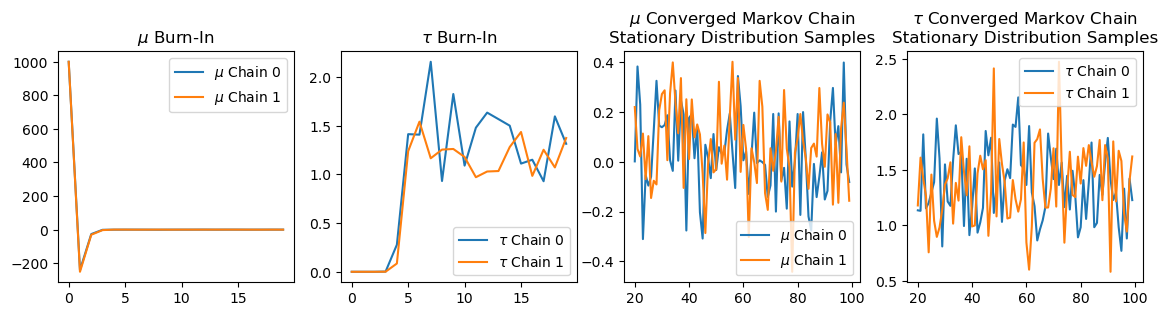

In [21]:
fig,ax = plt.subplots(1, 4, figsize=(14,3)); ax[0].set_title("$\\mu$ Burn-In"); ax[1].set_title("$\\tau$ Burn-In"); ax[2].set_title("$\\mu$ Converged Markov Chain\nStationary Distribution Samples"); ax[3].set_title("$\\tau$ Converged Markov Chain\nStationary Distribution Samples")
burn = 20
for c in range(C):
  ax[0].plot(mu[c,:burn], label="$\\mu$ Chain "+str(c)); ax[1].plot(tau[c,:burn], label="$\\tau$ Chain "+str(c)); ax[2].plot(np.arange(burn,G,dtype=int), mu[c,burn:], label="$\\mu$ Chain "+str(c)); ax[3].plot(np.arange(burn,G,dtype=int), tau[c,burn:], label="$\\tau$ Chain "+str(c))
ax[0].legend(); ax[1].legend(); ax[2].legend(); ax[3].legend(); 

<a name="cell-MCint-RaoB"></a>

## 3.B.d More Sampling Efficiency: Rao-Blackwellization ([Return to TOC](#cell-MCMC-TOC))

---


|*Rao-Blackwellization* leverages| |
|:-:|-| 
| <br>$$E[g(x)]=E_z[E_{x|z}[g(x)|z]]$$ <br>but the latter is a<br>lower variance estimator<br><br>$$ \text{Var}_{x}[g(x)] \geq \text{Var}_z[E_{x|z}[g(x)|z]] $$<br>| ***Rao-Blackwellization*** is encountered in Bayesian context where [expectations of conditional distributions](https://arxiv.org/pdf/2101.01011.pdf), such as those automatically produced by ***Gibbs sampling***, provide lower variance ***integral estimates*** that samples from marginal distributions |

$$\begin{align*}
\text{Var}_{x}[g(x)] = {} & E_{x}\left[g(x)^2\right] - E_{x}\left[g(x)\right]^2\\
= {} & \overbrace{E_{z}\left[ E_{x|z}\left[ g(x)^2 | z\right]\right]}^{\int \int g(x)^2 \frac{p(x,z)}{p(z)}p(z) dxdz} - \overbrace{E_{z}\left[E_{x|z}[g(x)|z]\right]^2}^{\left(\int \int g(x) \frac{p(x,z)}{p(z)}p(z)dxdz \right)^2}\\
= {} & E_{z}\left[ E_{x|z}\left[ g(x)^2 | z\right]\right] - \left( E_{z}\left[E_{x|z}[g(x)|z]^2\right] - \text{Var}_{z}\left[E_{x|z}[g(x)|z]\right] \right) \\
= {} & E_{z}\left[ E_{x|z}\left[ g(x)^2 | z\right] -  E_{x|z}[g(x)|z]^2\right] + \text{Var}_{z}\left[E_{x|z}[g(x)|z]\right]  \\
= {} &  E_z[\text{Var}_{x|z}([g(x)|z])] + \text{Var}_z(E_{x|z}[g(x)|z]) \\
\geq {} &  \text{Var}_z(E_{x|z}[g(x)|z]) 
\end{align*}$$



<a name="cell-MCint-sampling-MCMC-MH"></a>

## 3.B.e Metropolis-Hastings (MH) ([Return to TOC](#cell-MCMC-TOC))

---

The (***Markov***) ***proposal distribution*** 

$$\tilde \theta^{(t)} \sim \tilde p(\tilde \theta^{(t)}|\theta^{(t-1)})$$

accepted as  

$$\theta^{(t)} = \left\{\begin{array}{ll}
\tilde \theta^{(t)} & \text{with probability } \min\left(1,\frac{p(\tilde \theta^{(t)}|x)}{p(\theta^{(t-1)}|x)}\frac{\tilde p(\theta^{(t-1)}|\tilde \theta^{(t)})}{\tilde p(\tilde \theta^{(t)}|\theta^{(t-1)})}\right)\\
\theta^{(t-1)} & \text{otherwise}
\end{array}\right.$$

will create a ***Markov chain*** with ***stationary distribution*** $p(\theta|x)$. 


|For ***symmetric proposal distribution*** | the ***acceptance probability*** reduces to |
|-|-|
|$$\frac{\tilde p(\theta^{(t-1)}|\tilde \theta^{(t)})}{\tilde p(\tilde \theta^{(t)}|\theta^{(t-1)})} = 1$$|$$\min\left(1,\frac{p(\tilde \theta^{(t)}|x)}{p(\theta^{(t-1)}|x)}\right)$$|


## 3.B.e Metropolis-Hastings (MH)

---


Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [x]


Sampling 4 chains for 0 tune and 500 draw iterations (0 + 2_000 draws total) took 0 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


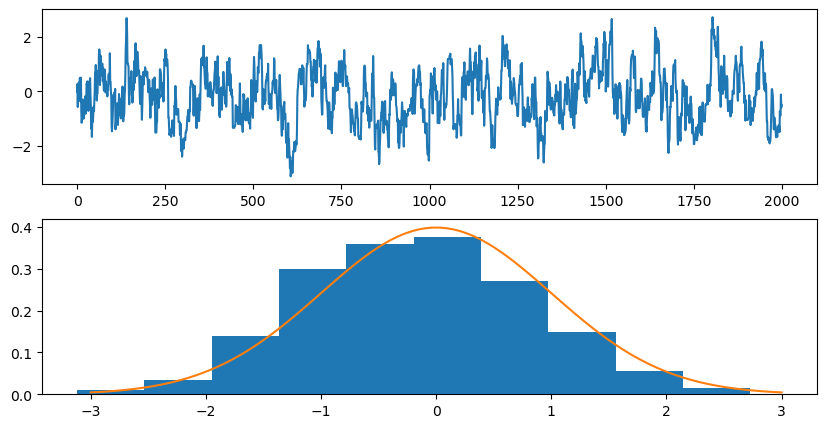

In [23]:
import pymc as pm; import matplotlib.pyplot as plt; import numpy as np; from scipy import stats
# A demonstration of depdendent samples which over time nonetheless represent a marginal distribution
with pm.Model() as model:
    x = pm.Normal("x", mu=0, sigma=1)
    dependent_samples = pm.sample(500, tune=False, return_inferencedata=False, 
                                  step=pm.Metropolis(vars=[x], S=np.array([0.5])))
fig,ax = plt.subplots(2,1, figsize=(10,5)); ax[0].plot(dependent_samples['x']); ax[1].hist(dependent_samples['x'], density=True); ax[1].plot(np.linspace(-3,3,100), stats.norm.pdf(np.linspace(-3,3,100)));

## 3.B.e Metropolis-Hastings (MH)

---

In [29]:
import matplotlib.pyplot as plt; import numpy as np; from scipy import stats; import matplotlib.pyplot as plt
# Here's an example of MH with a non-symmetric proposal
proposal_dist = stats.gamma(a=2, loc=-2); target_dist = stats.norm(); T = 1000; MH_samples = np.zeros(T)
for t in range(1,T):
  current = MH_samples[t-1]; proposal = current + proposal_dist.rvs(size=1)
  acceptance_probability = target_dist.pdf(proposal)/target_dist.pdf(current)*\
                           proposal_dist.pdf(current-proposal)/proposal_dist.pdf(proposal-current)
  if stats.uniform().rvs(size=1) < acceptance_probability:
    MH_samples[t] = proposal
  else:
    MH_samples[t] = MH_samples[t-1]

/var/folders/sd/hnfh4zsn34d7xpbz9226pz200000gn/T/ipykernel_69926/409531311.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  MH_samples[t] = proposal


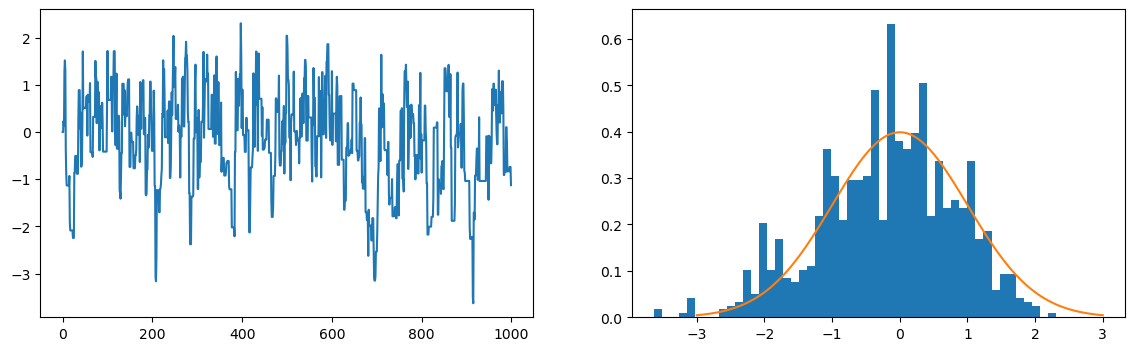

In [27]:
fig,ax = plt.subplots(1,2, figsize=(14,4)); ax[0].plot(MH_samples); ax[1].hist(MH_samples, density=True, bins=50); x = np.linspace(-3,3,100); ax[1].plot(x, target_dist.pdf(x))

<a name="cell-MCint-Hamiltonian-Dynamics"></a>

## 3.C Hamiltonian Dynamics ([Return to TOC](#cell-MCMC-TOC))

---

A ***Hamiltonian system*** is ***physical dynamics*** decomposing 
***energy*** into ***potential*** $U(\theta)$ and ***kinetic*** $K(v)$ ***energy*** according to ***energy equations*** which obeys the ***law of conservation of energy***

wing is the ***Hamiltonian energy equation*** which is the ***log of a joint probability distribution***

$$\Large
\begin{align*}
H(\theta, z) = {} & U(\theta) + K(v|\theta) \\
\text{often simplified to } \Longrightarrow \quad = {} & U(\theta) + K(v)
\end{align*}$$


- with parameters $\theta$  of interest and ***auxilliary variables*** $v$  (of the same dimension as $\theta$) 
- [***Auxilliary variables*** $v$ are only used to operationalize the process, as with ***slice sampling***]

The ***potential energy*** $U(\theta)$ and ***kinetic*** $K(v)$ ***energy*** (***momentum*** or ***velocity***) inversely link through

$$\Large \begin{align*} 
\frac{d\theta}{dt} & = {} \frac{dH}{dv}(v(t)) & \frac{dv}{dt} & = {}  -\frac{dH}{d\theta}(\theta(t))\\
\end{align*}$$

which is the ***Hamiltonian dynamics system*** that sustains the balance of ***potential*** and ***kinetic energy*** 

<a name="cell-MCint-sampling-MCMC-HMC-contour"></a>

## 3.C.a Energy Contours ([Return to TOC](#cell-MCMC-TOC))

---

$\theta$ and $v$ ***energy*** parameters of a ***Hamiltonian dynamics system*** are evolved by differential equations across time $t$ always vice-versa compensating so overall ***energy*** (log joint density) stays constant<br>

Since ***Hamiltonian dynamics*** maintain the ***law of conservation of energy*** it evolves parameters $\theta_0 \overset{time}{\rightarrow} \theta_t$ and $v_0 \overset{time}{\rightarrow} v_t$ so the log joint density (***energy***) stays constant $p(\theta_0, v_0|x) = p(\theta_t, v_t|x)$ 

- A discrete timestep process approximating (continuous) differential equation evolution updates $\theta^{(t)}$ and $v^{(t)}$ uses small time steps corresponding to changes in time $\frac{d\theta}{dt}$ and $\frac{dv}{dt}$
    <!-- - [We'll look at the details of this process more carefully next week!]-->


- ***Hamiltonian dynamics*** thus moves parameters along the ***level-set contours*** of the ***(log) joint probability distribution***... *which is going to allow the distribution to be  efficiently traversed...*

![](https://i.stack.imgur.com/mJoHA.png)

<a name="cell-MCint-sampling-MCMC-HMC-energy-proposals"></a>

## 3.C.b Energy Perturbation Proposals ([Return to TOC](#cell-MCMC-TOC))

---

Inceasing or decreasing ***energy*** is moving vertically up or down<br>to higher or lower levels of the contours of the log joint density
- Randomly perturbing the ***momentum*** $v_t$ to $v_t+\epsilon$ changes the overall ***energy***

![](https://i.stack.imgur.com/mJoHA.png)

- The concepts of these figures are discussed in this [stack exchange question](https://stats.stackexchange.com/questions/324346/hamiltonian-monte-carlo-how-to-make-sense-of-the-metropolis-hasting-proposal) referencing an [introductory HMC paper](https://arxiv.org/abs/1701.02434) where $p=\theta$ *potential energy* and $q=v$ *momentum*


<a name="cell-MCint-sampling-MCMC-HMC-MH"></a>

## 3.C.c Putting it All Together:<br>Metropolis-Hastings Proposals ([Return to TOC](#cell-MCMC-TOC))

---

1. ***Hamiltonian dynamics*** for $\theta_0 \overset{time}{\rightarrow} \theta_t$ and $v_0 \overset{time}{\rightarrow} v_t$ are (theoretically) deterministic
    - Moving deterministic on probability distribution contours isn't random sampling
    - Sampling $(\theta_t, v_t)$ ***uniformly*** from all possible points on a current contour is; but, 
    - countours aren't known in advance, so a random number of steps $t$ is taken instead

2. ***Hamiltonian dynamics*** with random trajectory lengths $t$ and a final perturbation $\epsilon$ creats  proposal $(\theta_t, v_t+\epsilon_t)$ from the initial value $(\theta_0, v_0)$

    - ***Metropolis-Hastings*** proposal acceptance is then 

$$\min\left(1,\frac{p(\theta_t, v_t+\epsilon|x)}{p(\theta_0, v_0|x)}\frac{\tilde p(\theta_0, v_0|\theta_t, v_t+\epsilon)}{\tilde p(\theta_t, v_t+\epsilon|\theta_0, v_0)}\right)$$

for ***Metropolis-Hastings proposal distribution*** $\tilde p(\theta_t, v_t+\epsilon|\theta_0, v_0)$ specifying the probability of evolving $\theta_0, v_0$ to $\theta_t, v_t+\epsilon$ [based on subsequent random proposal distributions for $t$ and $\epsilon$]


<a name="cell-MCint-sampling-MCMC-HMC"></a>

## 3.C.d Hamiltonian Monte Carlo (HMC) ([Return to TOC](#cell-MCMC-TOC))

---

***Hamiltonian Monte Carlo*** efficient samples distributions through the process of<br>(A) evolving random contour trajectory lengths evolved according to ***Hamiltonian dynamics***,<br>(B) subsequently perturbing ***energy***, and (C) accpeting/rejecting these proposals using ***M-H*** 

![](https://i.stack.imgur.com/mJoHA.png)

A fun HMC visualization worth looking over is given in this [Brilliantly Wrong blog post](https://arogozhnikov.github.io/2016/12/19/markov_chain_monte_carlo.html); however,<br>trajectory length not animation speed reflects total ***energy***

<sub><sup>The Z-axis is the ***potential energy*** $U(\theta)$ which is inversely proportional to the ***kinetic energy*** $K(v)$ with the ***momentum*** $v$ implicit based on the hill climbing. Including $v$ into this visualization would require 4 parameter dimensions, and would traverse contour levels on a 5th dimension in the manner of "FIG. 22". Since $\theta$ and $v$ are two-dimensional, trajectories are not just forwards or backwards, but can be given initial directions and evolved in two-dimensional space.</sup></sub>



<a name="cell-MCint-sampling-MCMC-HMC2"></a>

## 3.C.e Why Hamiltonian Monte Carlo (HMC)? ([Return to TOC](#cell-MCMC-TOC))

---

## The "Curse of Dimensionality" 
- breaks ***Gibbs sampling*** moving only one dimension at at time<br>[regardless of using ***adaptive squeezed rejection*** or ***slice sampling*** or whatever]
    - cannot efficiently explore high dimensional space
- breaks vanilla "random perturbation" ***Metropolis-Hastings*** 
    - proposals "don't move enough" or "fly off the distribution" in high dimensions


## The *Metropolis-Hastings* acceptance rates are crucial...

- ***Sticky chains*** rarely accept proposals and barely move
- ***Poorly mixing chains*** always accept very small changes, so still don't explore quickly enough

## The MHC scheme has amazing proposals and accpetance rates: they move far from current values but don't "fly off" the distribution


> Notice that while this characterizes each $x^{(t)}$ as a sample from $p_{X}$, the $x^{(t)}$ itself can be a multivariate random variable. 



<a name="cell-MCint-sampling-MCMC-HMC3"></a>

## 3.C.f Marginal/Posterior Distributions ([Return to TOC](#cell-MCMC-TOC))

---

A ***HMC chain*** created with ***MH MCMC*** based on perturbations of propsoals created through ***Hamiltonian dynamics***

$$(\theta^{(T)}, v^{(T)}), \cdots, (\theta^{(1)}, v^{(1)}), (\theta^{(0)}, v^{(0)})$$

represents a sequence of dependent samples from the target joint distribution $(\theta^{(t)}, v^{(t)}) \sim p(\theta, v|x)$.  

Therefore, 

$$\theta^{(T)}, \cdots, \theta^{(1)}, \theta^{(0)}$$

represents a sequence of dependent samples from the target marginal distribution $\theta^{(t)} \sim p(\theta| x)$.  

- Note that the appearance of the $p(\theta_t, v_t|x)$ notation suggests that the joint density of the $(\theta, v)$ is a ***posterior distribution*** of interest.  Indeed this is true, but, since $v$ is just an ***auxiliary variable***, it's most common to just use the simplifying assumption $p(\theta_t, v_t|x) = p(\theta_t|x)p(v_t)$ as part of the overall specification so that the ***Hamiltonian system*** is actually $H(\theta, z|x) = U(\theta|x) + K(v)$.




In [ ]:
# This is a classic example of a hierarchical "random effects" Bayesian model 
# The probabilistic specification and the code below can be found here:
# https://docs.pymc.io/en/v3/pymc-examples/examples/diagnostics_and_criticism/Diagnosing_biased_Inference_with_Divergences.html
# https://www.pymc.io/projects/examples/en/latest/diagnostics_and_criticism/Diagnosing_biased_Inference_with_Divergences.html#diagnosing-with-divergences

import logging
_log = logging.getLogger("pymc")
_log.setLevel(logging.INFO) # Option 0
#_log.setLevel(logging.WARNING) # Option 1
#_log.setLevel(logging.ERROR) # Option 2

# Suppose there are 8 groups with average measurements y and standard error sigma
# where the standard errors have to do with sample size and intergroup variaion
J = 8
y = np.array([28.0, 8.0, -3.0, 7.0, -1.0, 1.0, 18.0, 12.0])
sigma = np.array([15.0, 10.0, 16.0, 11.0, 9.0, 11.0, 10.0, 18.0])
# Suppose we are interested in learning the overall average across all 8 groups
# accounting for the uncertainty in each of the measurements of the groups
# using the following probabilisitic programming specification
with pm.Model() as Centered_eight:
    # we assume the following prior distributions for our parameters
    mu = pm.Normal("mu", mu=0, sigma=5)
    tau = pm.HalfCauchy("tau", beta=5) 
    # and we assume the following probabilistic hierarchy
    theta = pm.Normal("theta", mu=mu, sigma=tau, shape=J)
    # Note that if tau was small, then the density evalution above 
    # could change rapidly for changes in theta
    # This means that the energy has high curvature 
    obs = pm.Normal("obs", mu=theta, sigma=sigma, observed=y)

# This model can be sampled using HMC
# The auxiliary variables are added to the specification "under the hood"
SEED = [20100420, 20134234] # random seeds for each of two run HMC chains
with Centered_eight:
    fit_C = pm.sample(5000, chains=2, tune=1000, random_seed=SEED,
                      return_inferencedata=True, idata_kwargs={"log_likelihood": True}) 

INFO:pymc:Auto-assigning NUTS sampler...
INFO:pymc:Initializing NUTS using jitter+adapt_diag...
INFO:pymc:Sequential sampling (2 chains in 1 job)
INFO:pymc:NUTS: [mu, tau, theta]


INFO:pymc:Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 43 seconds.
INFO:pymc:We recommend running at least 4 chains for robust computation of convergence diagnostics


In [ ]:
# previous versions of pymc, i.e., pymc3 gave the following errors

#ERROR:pymc3:There were 100 divergences after tuning. Increase `target_accept` or reparameterize.
#WARNING:pymc3:The acceptance probability does not match the target. It is 0.7073435948155605, but should be close to 0.8. Try to increase the number of tuning steps.
#ERROR:pymc3:There were 265 divergences after tuning. Increase `target_accept` or reparameterize.
#WARNING:pymc3:The acceptance probability does not match the target. It is 0.6771097025238918, but should be close to 0.8. Try to increase the number of tuning steps.
#ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.

# but the most recent versions of pymc no longer track this, so
# `_log.setLevel(logging.WARNING)` and `_log.setLevel(logging.ERROR)`
# have no effect now

In [ ]:
# As is seen above, there are many divergences; and, the acceptance rate is quite low
# This is because the specification above induces high curature in the energy 
# as described above; but, here's a specification that alleviates this problem.

with pm.Model() as NonCentered_eight:
    mu = pm.Normal("mu", mu=0, sigma=5)
    tau = pm.HalfCauchy("tau", beta=5)
    theta_tilde = pm.Normal("theta_t", mu=0, sigma=1, shape=J)
    # Changes in theta now take place on a fixed scale that is independent of tau
    theta = pm.Deterministic("theta", mu + tau * theta_tilde)
    # Changes in tau can still result in rapid changes in the density evaluations below
    # so the energy still has high curvature with respect to tau; but, 
    # it no longer has high curvature with respect to theta
    obs = pm.Normal("obs", mu=theta, sigma=sigma, observed=y)

with NonCentered_eight:
    fit_NC = pm.sample(5000, chains=2, tune=1000, random_seed=SEED, 
                       return_inferencedata=True, idata_kwargs={"log_likelihood": True}) 
# The suggestion to "Increase `target_accept`" below means use smaller
# \delta time steps when evolving the Hamiltonian dynamics:
# this would result in fewer divergences and higher acceptances rates

INFO:pymc:Auto-assigning NUTS sampler...
INFO:pymc:Initializing NUTS using jitter+adapt_diag...
INFO:pymc:Sequential sampling (2 chains in 1 job)
INFO:pymc:NUTS: [mu, tau, theta_t]


INFO:pymc:Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 20 seconds.
INFO:pymc:We recommend running at least 4 chains for robust computation of convergence diagnostics


In [ ]:
# These warnings are no longer tracked
# ERROR:pymc3:There were 21 divergences after tuning. Increase `target_accept` or reparameterize.
# ERROR:pymc3:There were 40 divergences after tuning. Increase `target_accept` or reparameterize.

In [ ]:
# Current support for examining sampling diagnostics is given here
# https://www.pymc.io/projects/examples/en/latest/diagnostics_and_criticism/sampler-stats.html
# Demonstrations of posterior analysis is demonstrated here 
# https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/pymc_overview.html#posterior-analysis
# and will be explored during your final homework assignment

Centered Parameterization:
- divergences require decreased step size and hence increasing HMC chain dependency
- and hence decreased effective sample size
Uncentered Parameterization:
- less divergences alows longer contour trajectories step size and hence increasing HMC chain dependency
- and hence decreased effective sample size


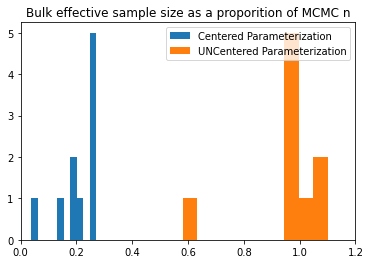

In [ ]:
print('Centered Parameterization:')
print('- divergences require decreased step size and hence increasing HMC chain dependency')
print('- and hence decreased effective sample size')
with Centered_eight: 
  plt.hist(pm.summary(fit_C)['ess_bulk']/10000,
           label = "Centered Parameterization")
print('Uncentered Parameterization:')
print('- less divergences alows longer contour trajectories step size and hence increasing HMC chain dependency')
print('- and hence decreased effective sample size')
with NonCentered_eight: 
  plt.hist(pm.summary(fit_NC)['ess_bulk'][9:]/10000,
           label = "UNCentered Parameterization")
plt.legend(); plt.title("Bulk effective sample size as a proporition of MCMC n"); plt.xlim((0,1.2));

In [ ]:
# Above are histograms of the effective sample size 
# as a fraction of of the number of HMC samples
# for each of the parameters in the model
with Centered_eight: 
  print(pm.summary(fit_C)['ess_bulk'])

mu          1534.0
theta[0]    1858.0
theta[1]    2541.0
theta[2]    2645.0
theta[3]    2686.0
theta[4]    2197.0
theta[5]    2558.0
theta[6]    1944.0
theta[7]    2705.0
tau          381.0
Name: ess_bulk, dtype: float64


In [ ]:
# the noncentered parameterization keeps track of theta_t on the N(0,1) scale
# but the deterministically transformed theta is really the parameter that matters
with NonCentered_eight: 
  print(pm.summary(fit_NC)['ess_bulk'])

mu             9312.0
theta_t[0]    10129.0
theta_t[1]     9280.0
theta_t[2]    11847.0
theta_t[3]     9086.0
theta_t[4]     7475.0
theta_t[5]     8972.0
theta_t[6]     7980.0
theta_t[7]     8229.0
tau            5819.0
theta[0]       9928.0
theta[1]      11003.0
theta[2]       9448.0
theta[3]      10218.0
theta[4]       9752.0
theta[5]      10726.0
theta[6]       9559.0
theta[7]       9480.0
Name: ess_bulk, dtype: float64


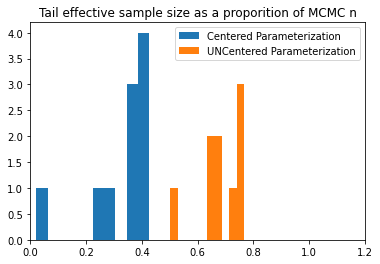

In [ ]:
# Here is another interesting diagnostic which shows the effective sample size
# when restricted to samples in the tails of the HMC samples.
# It suggests how efficiently the HMC samples traverse the extremes of the distribution
with Centered_eight: 
  plt.hist(pm.summary(fit_C)['ess_tail']/10000,
           label = "Centered Parameterization")
with NonCentered_eight: 
  plt.hist(pm.summary(fit_NC)['ess_tail'][9:]/10000,
           label = "UNCentered Parameterization")
plt.legend(); plt.title("Tail effective sample size as a proporition of MCMC n"); plt.xlim((0,1.2));